# Phantom results

<p style="text-align:justify;">
An overview of the T1 results for the submitted NIST phantom datasets are displayed in Figure 3. The same data is presented in each column with different axes types (linear, log, and error) to better visualize the results. The left column (a,d) shows the mean T1 with their standard deviations in each of the 14 ROIs are plotted against temperature-corrected reference T1 values using linear axes for a representative dataset (a) and all datasets (d). The middle column (b,e) displays the same mean T1 datasets as (a,d) but using log-log axes. The right column (c,f) displays the error (%) of the measured T1 relative to the temperature-corrected NIST reference values; the dotted lines represent a ±10% error. Figure 3a shows a strong linear trend and slight underestimation (slope = 0.98, intercept = -14 ms) for this dataset in comparison to the reference T1 values. However, this trend breaks down for low T1 values (T1 < 100-200 ms), as seen in the log-log plot (Figure 3b), which was expected because the imaging protocol is optimized for human T1 values (T1 > 500 ms). Errors exceeding 10% are observed for T1 values of phantom spheres below this threshold (Figure 3c). These trends are observed for the entire-dataset plots as well (Figure 3d-f). More variability is seen in Figure 3d around the identity diagonal at very high T1 (T1 ~ 2000 ms) than towards the WM-GM values (T1 ~ 600-1400 ms), which is less apparent in the log-log plot (Figure 3e). In addition to the low T1 values exceeding the 10% error threshold (Figure 3f), a few measurements with outlier values (~3-4) human tissue range were observed in the human tissue range.
</p>

<p style="text-align:justify;">
<b>
Figure 3. Measured mean T1 values vs. temperature-corrected NIST reference values of the phantom spheres presented as linear plots (a,d), log-log plots (b,e), and plots of the error relative to reference T1 value. Plots (a–c) are of an example single dataset, whereas plots (d–f) are of all acquired datasets.
</b>
</p>

In [1]:
from os import path

if path.isdir('analysis')== False:
    !git clone https://github.com/rrsg2020/analysis.git

# Imports
import warnings
warnings.filterwarnings("ignore")

from pathlib import Path
import pandas as pd
import json
import nibabel as nib
import numpy as np

from analysis.src.database import *
from analysis.src.nist import get_reference_NIST_values, get_NIST_ids
from analysis.src.tools import calc_error
from analysis.src.nist import temperature_correction

import matplotlib.pyplot as plt
plt.style.use('analysis/custom_matplotlibrc')
plt.rcParams["figure.figsize"] = (10,10)
fig_id = 0

database_path = Path('analysis/databases/3T_NIST_T1maps_database.pkl')
output_folder = Path("analysis/plots/03_singledataset_scatter_NIST-temperature-corrected/")

estimate_type = 'mean' # median or mean

## Define Functions
def plot_single_scatter(x, y, y_std,
                        title, x_label, y_label,
                        file_prefix, folder_path, fig_id,
                        y_type='linear'):
    if y_type is 'linear':
        plt.errorbar(x,y, y_std, fmt='o', solid_capstyle='projecting')
        ax = plt.gca()
        ax.axline((1, 1), slope=1, linestyle='dashed')
        ax.set_ylim(ymin=0, ymax=2500)
        ax.set_xlim(xmin=0, xmax=2500)
    if y_type is 'log':
        plt.loglog(x,y,'o')
        ax = plt.gca()
        ax.set_ylim(ymin=20, ymax=2500)
        ax.set_xlim(xmin=20, xmax=2500)
    if y_type is 'error_t1':
        plt.errorbar(x,calc_error(x,y), fmt='o')
        ax = plt.gca()
        ax.axline((1, 0), slope=0, color='k')
        ax.axline((1, -10), slope=0, linestyle='dashed', color='k')
        ax.axline((1, 10), slope=0, linestyle='dashed', color='k')
        ax.set_ylim(ymin=-100, ymax=100)
        ax.set_xlim(xmin=0, xmax=2500)


    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    fig = plt.gcf()
    

    folder_path.mkdir(parents=True, exist_ok=True)

    if fig_id<10:
        filename = "0" + str(fig_id) + "_" + file_prefix
    else:
        filename = str(fig_id) + "_" + file_prefix

    fig.savefig(folder_path / (str(filename) + '.svg'), facecolor='white')
    fig.savefig(folder_path / (str(filename) + '.png'), facecolor='white')
    fig_id = fig_id + 1
    plt.show()
    return fig_id

## Load database

df = pd.read_pickle(database_path)

## Initialize array

dataset_estimate = np.array([])
dataset_std = np.array([])

index = 6.001

serial_number = df.loc[index]['phantom serial number']


for key in get_NIST_ids():
    if estimate_type == 'mean':
        dataset_estimate = np.append(dataset_estimate, np.mean(df.loc[index][key]))
    elif estimate_type == 'median':
        dataset_estimate = np.append(dataset_estimate, np.median(df.loc[index][key]))
    else:
        Exception('Unsupported dataset estimate type.')

    dataset_std = np.append(dataset_std, np.std(df.loc[index][key]))

ref_values = get_reference_NIST_values(serial_number)

temperature = df.loc[index]['phantom temperature']
temp_corrected_ref_values = temperature_correction(temperature, serial_number)




<>:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:42: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:47: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:42: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:47: SyntaxWarning: "is" with a literal. Did you mean "=="?


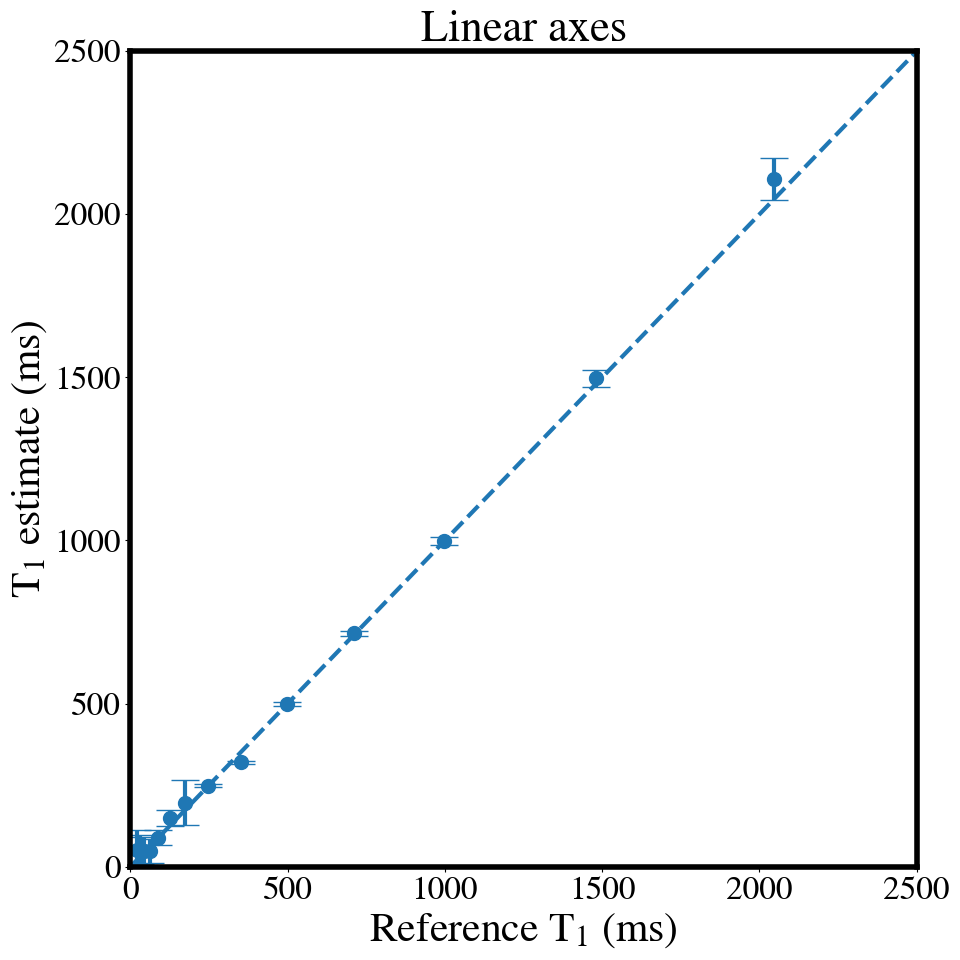

In [2]:
## Plot Fig 3a
fig_id = plot_single_scatter(x=temp_corrected_ref_values,
                             y=dataset_estimate,
                             y_std=dataset_std,
                             title='Linear axes',
                             x_label='Reference T$_1$ (ms)',
                             y_label="T$_1$ estimate (ms)",
                             file_prefix=str(index),
                             folder_path=output_folder,
                             fig_id=fig_id,
                             y_type='linear')

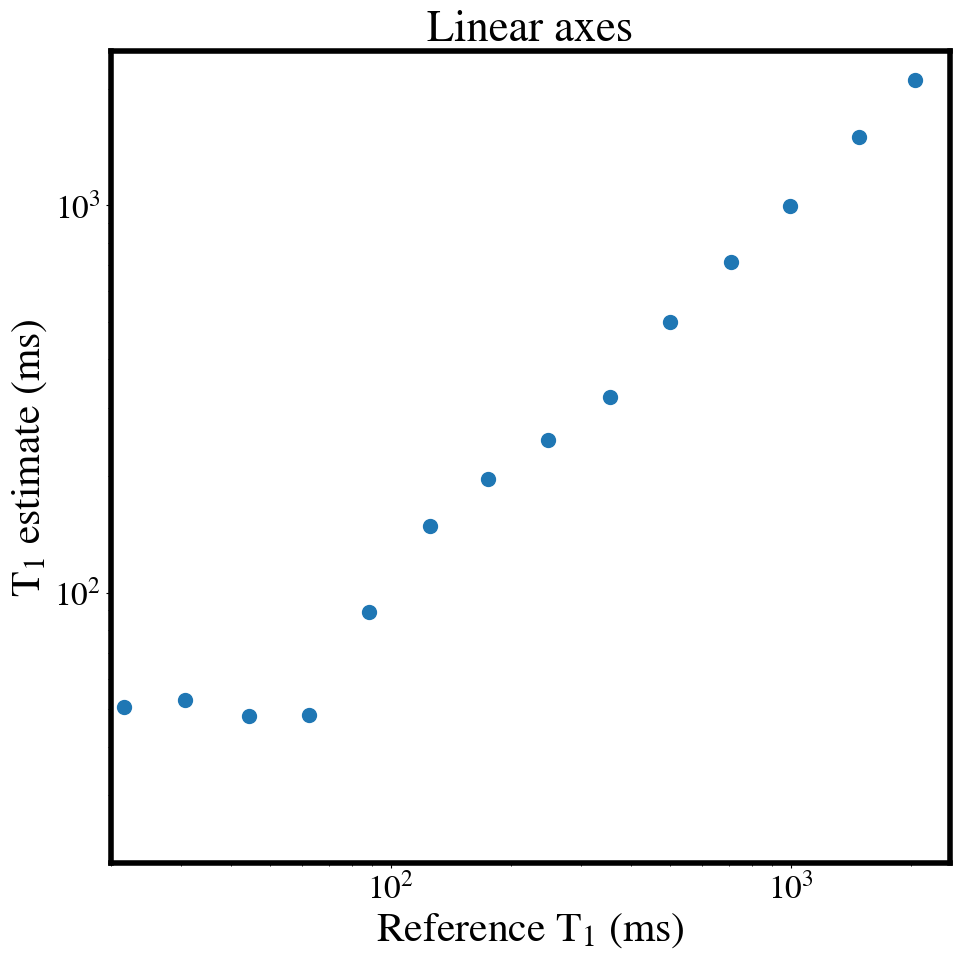

In [3]:
## Plot Fig 3b
fig_id = plot_single_scatter(x=temp_corrected_ref_values,
                             y=dataset_estimate,
                             y_std=dataset_std,
                             title='Linear axes',
                             x_label='Reference T$_1$ (ms)',
                             y_label="T$_1$ estimate (ms)",
                             file_prefix=str(index),
                             folder_path=output_folder,
                             fig_id=fig_id,
                             y_type='log')

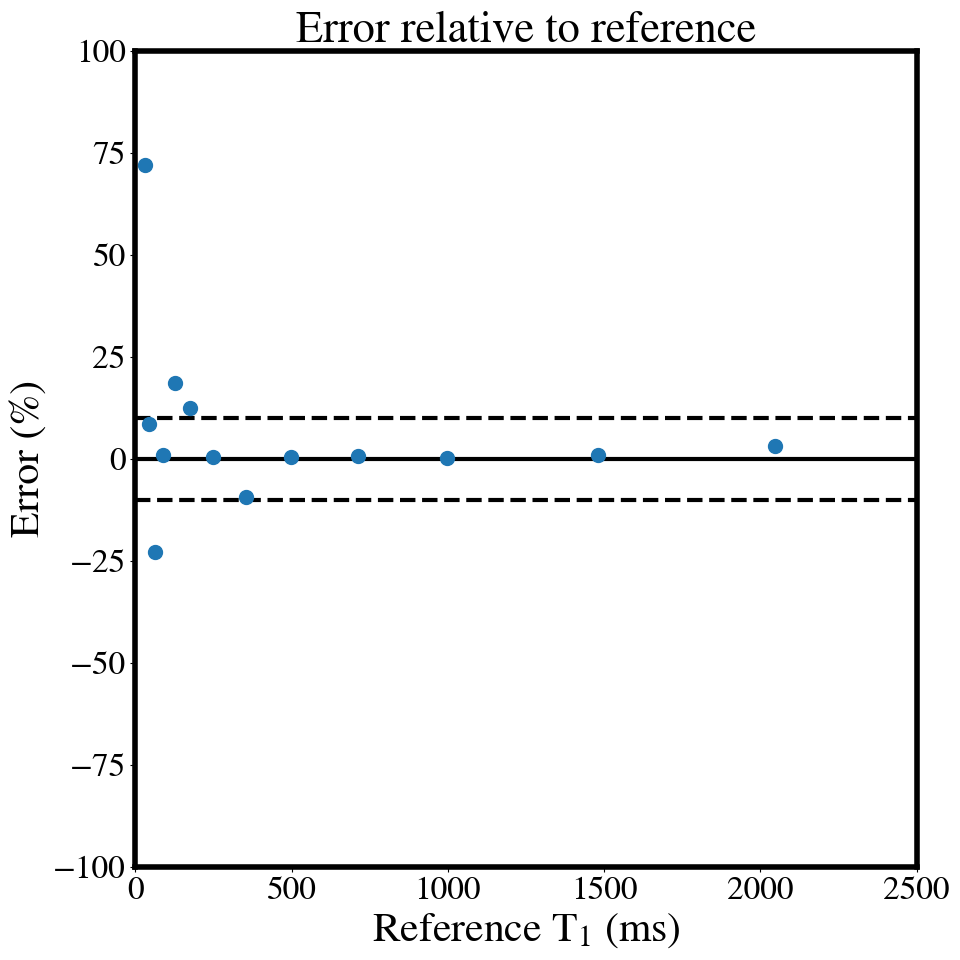

In [4]:
fig_id = plot_single_scatter(x=temp_corrected_ref_values,
                             y=dataset_estimate,
                             y_std=dataset_std,
                             title='Error relative to reference',
                             x_label='Reference T$_1$ (ms)',
                             y_label="Error (%)",
                             file_prefix=str(index),
                             folder_path=output_folder,
                             fig_id=fig_id,
                             y_type='error_t1')

In [ ]:
output_folder = Path("analysis/plots/04_alldatasets_scatter_NIST-temperature-corrected/")

## Initialize array

dataset_mean = np.zeros((1,14))
dataset_std = np.zeros((1,14))
version = np.array([])
temperature = np.array([])
ref_values = np.zeros((1,14))


ii=0
for index, row in df.iterrows():
    if type(df.loc[index]['T1 - NIST sphere 1']) is np.ndarray:

        version = np.append(version,df.loc[index]['phantom serial number'])
        temperature = np.append(temperature, df.loc[index]['phantom temperature'])


        if version[ii] is None:
            version[ii] = 999 # Missing version, only known case is one where we have version > 42 right now.
        
        if temperature[ii] is None:
            temperature[ii] = 20 # Missing temperature, assume it to be 20C (reference temperature).
            
            
        if ii==0:
            ref_values = get_reference_NIST_values(version[ii])
            temp_corrected_ref_values = temperature_correction(temperature[ii], version[ii])
        else:
            ref_values = np.vstack((ref_values, get_reference_NIST_values(version[ii])))
            temp_corrected_ref_values = np.vstack((temp_corrected_ref_values, temperature_correction(temperature[ii], version[ii])))
        
        tmp_dataset_estimate = np.array([])
        tmp_dataset_std = np.array([])

        for key in get_NIST_ids():
            if estimate_type is 'mean':
                tmp_dataset_estimate = np.append(tmp_dataset_estimate, np.mean(df.loc[index][key]))
            elif estimate_type is 'median':
                tmp_dataset_estimate = np.append(tmp_dataset_estimate, np.median(df.loc[index][key]))
            else:
                Exception('Unsupported dataset estimate type.')

            tmp_dataset_std = np.append(tmp_dataset_std, np.std(df.loc[index][key]))

        if ii==0:
            dataset_estimate = tmp_dataset_estimate  
            dataset_std = tmp_dataset_std
        else:
            dataset_estimate = np.vstack((dataset_estimate, tmp_dataset_estimate))
            dataset_std = np.vstack((dataset_std, tmp_dataset_std))

        ii=ii+1

## Setup for plots
fig_id = 0
dims=ref_values.shape
file_prefix = 'alldatasets'

In [ ]:
# Figure 3d

y_type = 'linear'
title = 'Linear axes'


for ii in range(dims[0]):
    
    x=temp_corrected_ref_values[ii,:]
    y=dataset_estimate[ii,:]
    y_std=dataset_std[ii,:]
    x_label='Reference T$_1$ (ms)'
    y_label="T$_1$ estimate (ms)"
    folder_path=output_folder

    if y_type == 'linear':
        plt.errorbar(x,y, y_std, fmt='o', solid_capstyle='projecting')
        ax = plt.gca()
        ax.axline((1, 1), slope=1, linestyle='dashed')
        ax.set_ylim(ymin=0, ymax=2500)
        ax.set_xlim(xmin=0, xmax=2500)
    if y_type == 'log':
        plt.loglog(x,y,'o')
        ax = plt.gca()
        ax.set_ylim(ymin=20, ymax=2500)
        ax.set_xlim(xmin=20, xmax=2500)
    if y_type == 'error_t1':
        plt.errorbar(x,calc_error(x,y), fmt='o')
        ax = plt.gca()
        ax.axline((1, 0), slope=0, color='k')
        ax.axline((1, -10), slope=0, linestyle='dashed', color='k')
        ax.axline((1, 10), slope=0, linestyle='dashed', color='k')
        ax.set_ylim(ymin=-100, ymax=100)
        ax.set_xlim(xmin=0, xmax=2500)


    plt.xlabel(x_label)
    plt.ylabel(y_label)

plt.title(title, fontsize=30)
fig = plt.gcf()
    

folder_path.mkdir(parents=True, exist_ok=True)


if fig_id<10:
    filename = "0" + str(fig_id) + "_" + file_prefix
else:
    filename = str(fig_id) + "_" + file_prefix

fig.savefig(folder_path / (str(filename) + '.svg'), facecolor='white')
fig.savefig(folder_path / (str(filename) + '.png'), facecolor='white')
fig_id = fig_id + 1

plt.show()

In [ ]:
# Figure 3e

y_type = 'log'
title = 'Log-log axes'

for ii in range(dims[0]):
    
    x=temp_corrected_ref_values[ii,:]
    y=dataset_estimate[ii,:]
    y_std=dataset_std[ii,:]
    x_label='Reference T$_1$ (ms)'
    y_label="T$_1$ estimate (ms)"
    folder_path=output_folder

    if y_type == 'linear':
        plt.errorbar(x,y, y_std, fmt='o', solid_capstyle='projecting')
        ax = plt.gca()
        ax.axline((1, 1), slope=1, linestyle='dashed')
        ax.set_ylim(ymin=0, ymax=2500)
        ax.set_xlim(xmin=0, xmax=2500)
    if y_type == 'log':
        plt.loglog(x,y,'o')
        ax = plt.gca()
        ax.set_ylim(ymin=20, ymax=2500)
        ax.set_xlim(xmin=20, xmax=2500)
    if y_type == 'error_t1':
        plt.errorbar(x,calc_error(x,y), fmt='o')
        ax = plt.gca()
        ax.axline((1, 0), slope=0, color='k')
        ax.axline((1, -10), slope=0, linestyle='dashed', color='k')
        ax.axline((1, 10), slope=0, linestyle='dashed', color='k')
        ax.set_ylim(ymin=-100, ymax=100)
        ax.set_xlim(xmin=0, xmax=2500)


    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

fig = plt.gcf()
    

folder_path.mkdir(parents=True, exist_ok=True)


if fig_id<10:
    filename = "0" + str(fig_id) + "_" + file_prefix
else:
    filename = str(fig_id) + "_" + file_prefix

fig.savefig(folder_path / (str(filename) + '.svg'), facecolor='white')
fig.savefig(folder_path / (str(filename) + '.png'), facecolor='white')
fig_id = fig_id + 1
plt.show()

In [ ]:
# Figure 3f
y_type = 'error_t1'
title = 'Error relative to reference'

for ii in range(dims[0]):
    
    x=temp_corrected_ref_values[ii,:]
    y=dataset_estimate[ii,:]
    y_std=dataset_std[ii,:]
    x_label='Reference T$_1$ (ms)'
    y_label="Error (%)"
    folder_path=output_folder

    if y_type == 'linear':
        plt.errorbar(x,y, y_std, fmt='o', solid_capstyle='projecting', capsize=5)
        ax = plt.gca()
        ax.axline((1, 1), slope=1, linestyle='dashed')
        ax.set_ylim(ymin=0, ymax=2500)
        ax.set_xlim(xmin=0, xmax=2500)
    if y_type == 'log':
        plt.loglog(x,y,'o')
        ax = plt.gca()
        ax.set_ylim(ymin=20, ymax=2500)
        ax.set_xlim(xmin=20, xmax=2500)
    if y_type == 'error_t1':
        plt.errorbar(x,calc_error(x,y), fmt='o')
        ax = plt.gca()
        ax.axline((1, 0), slope=0, color='k')
        ax.axline((1, -10), slope=0, linestyle='dashed', color='k')
        ax.axline((1, 10), slope=0, linestyle='dashed', color='k')
        ax.set_ylim(ymin=-100, ymax=100)
        ax.set_xlim(xmin=0, xmax=2500)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ylim(top=100)

fig = plt.gcf()
    

folder_path.mkdir(parents=True, exist_ok=True)


if fig_id<10:
    filename = "0" + str(fig_id) + "_" + file_prefix
else:
    filename = str(fig_id) + "_" + file_prefix

fig.savefig(folder_path / (str(filename) + '.svg'), facecolor='white')
fig.savefig(folder_path / (str(filename) + '.png'), facecolor='white')
fig_id = fig_id + 1
plt.show()

<p style="text-align:justify;">
Inter-participant coefficient of variations (COV) were calculated by selecting one single T1 map submitted per challenge participant and calculating the COV of the T1  means per sphere. The average inter-participant COV across the first five spheres representing the expected range in the human brain was 6.1 % (sphere 1 = 4.7 %, sphere 2 = 3.1 %, sphere 3 = 6.3 %, sphere 4 = 12.8 %, sphere 5 = 7.3 %). Two sites were clear outliers that had particular issues for sphere 4, likely due to a combination of an implementation error and a resulting uncertainty of where the signal null lies for his four-TI measurement at that T1 value; by removing these outliers, the mean inter-participant COV reduces to 4.1 % (sphere 1 = 5.4 %, sphere 2 = 3. 5%, sphere 3 = 2.5 %, sphere 4 = 4.2 %, sphere 5 = 4.9 %). One participant measured T1 maps with one phantom using one implemented protocol at 7 different sites using a single manufacturer, and so a mean intra-participant COV across the first five spheres for this case was calculated to be 2.9 % (sphere 1 = 4.9 %, sphere 2 = 3.5 %, sphere 3 = 2.6 %, sphere 4 = 2.0 %, sphere 5 = 1.6 %). 
</p>

<p style="text-align:justify;">
<b>
Figure 4. Scatter plot comparing complex and magnitude-only fitted data. The markers are color-coded based on the implementation site, while their size represents the difference (annotated for scale) between two cases of T1 estimations for each sphere (from 1 to 7).
</b>
</p>

<p style="text-align:justify;">
Figure 4 compared the mean T1 values measured using complex and magnitude-only data for the 11 datasets where authors provided both in their submissions. Note that these datasets are from the same acquisition, not two unique acquisitions. Figure 4a shows that for the range of T1 values expected in the brain (T1 > 500 ms), there is almost no difference in fitted T1 values between the two types of data. However, for T1 values less than ~250 ms, there are large errors, which are likely due to poor fitting using a protocol that is not optimized for this range of T1 values. Voxel-wise scatterplots of these datasets are shown in Figure 4b, which exhibit a very strong correlation (stats), with only a few outlier voxels (out of #) for the brain-tissue range of T1 values.
</p>

<p style="text-align:justify;">
<b>
Figure 5. Fill in
</b>
</p>